# fashion MNIST 데이터셋을 활용한 손글씨(0~9) 예측하는 다중분류

### 데이터를 준비하거라.

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


## 훈련셋 확인

In [2]:
print('X_train.shape:', X_train.shape)
print('X_train.shape:', y_train.shape)
print('y_train:', y_train)

X_train.shape: (60000, 28, 28)
X_train.shape: (60000,)
y_train: [9 0 0 ... 3 0 5]


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

## 테스트셋

In [4]:
print('X_test.shape:', X_test.shape)
print('X_test.shape:', y_test.shape)
print('y_test:', y_test)

X_test.shape: (10000, 28, 28)
X_test.shape: (10000,)
y_test: [9 2 1 ... 8 1 5]


## 데이터 그려보기

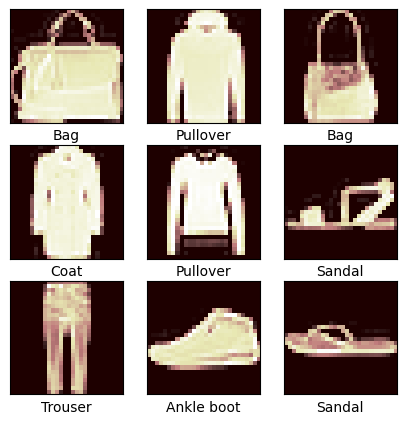

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)

# Fashion-MNIST의 레이블에 해당하는 품목.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑기.
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'pink') # 20210218 오탈자
    plt.xlabel(class_names[y_train[idx]]) # 20210218 오탈자

plt.show()

## 데이터 전처리



1.   스케일링(범위축소) 0 ~ 1
2.   레이블 범주형 변경







In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### 데이터 스케일링

In [7]:
# 값의 범위를 0 ~ 1로 만들어줍니다.
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### 레이블: 범주형으로 변경

In [8]:
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경하는 작업
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('real_y_test[0]',real_y_test[0])
print('y_test[0]',y_test[0])

real_y_test[0] 9
y_test[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [9]:
from sklearn.model_selection import train_test_split

# 훈련 데이터셋 70, 검증 데이터셋 30

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 7)

In [10]:
print('X_train.shape: ', X_train.shape)
print('X_val.shape: ', X_val.shape)

X_train.shape:  (42000, 28, 28)
X_val.shape:  (18000, 28, 28)


## 첫 번째 모델 구성하기

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28) -> 1차원 784
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

## 첫번째 모델 설정하기

In [12]:
first_model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc'])

## 첫 번째 모델 학습하기

In [13]:
first_history = first_model.fit(X_train, y_train,
                epochs = 30,
                batch_size = 128,
                validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 6s 13ms/step - loss: 0.6483 - acc: 0.7805 - val_loss: 0.4979 - val_acc: 0.8252
Epoch 2/30
329/329 [==============================] - 3s 10ms/step - loss: 0.4394 - acc: 0.8465 - val_loss: 0.4220 - val_acc: 0.8486
Epoch 3/30
329/329 [==============================] - 4s 12ms/step - loss: 0.3931 - acc: 0.8607 - val_loss: 0.3826 - val_acc: 0.8631
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3714 - acc: 0.8677 - val_loss: 0.3977 - val_acc: 0.8584
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3538 - acc: 0.8718 - val_loss: 0.3589 - val_acc: 0.8714
Epoch 6/30
329/329 [==============================] - 4s 12ms/step - loss: 0.3324 - acc: 0.8797 - val_loss: 0.3423 - val_acc: 0.8767
Epoch 7/30
329/329 [==============================] - 5s 14ms/step - loss: 0.3202 - acc: 0.8840 - val_loss: 0.3501 - val_acc: 0.8750
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - l

## 두번째 모델 구성

In [14]:
# 모델 구성하기

second_model = Sequential()

second_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28)
second_model.add(Dense(128, activation = 'relu')) # 첫번째 모델보다 층 하나 더 추가
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))  # 10개로 최종출력, soft max

# 모델 설정하기
second_model.compile(optimizer='adam', # 옵티마이저: Adam
              loss = 'categorical_crossentropy', # 손실 함수: categorical_crossentropy
              metrics=['acc'])


# 모델 학습하기

second_history = second_model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 4s 9ms/step - loss: 0.6282 - acc: 0.7887 - val_loss: 0.4701 - val_acc: 0.8348
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4276 - acc: 0.8490 - val_loss: 0.3952 - val_acc: 0.8639
Epoch 3/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3826 - acc: 0.8630 - val_loss: 0.3604 - val_acc: 0.8711
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3559 - acc: 0.8732 - val_loss: 0.3642 - val_acc: 0.8672
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3353 - acc: 0.8774 - val_loss: 0.3440 - val_acc: 0.8757
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3149 - acc: 0.8847 - val_loss: 0.3768 - val_acc: 0.8645
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3000 - acc: 0.8911 - val_loss: 0.3417 - val_acc: 0.8751
Epoch 8/30
329/329 [==============================] - 3s 8ms/step - loss: 0

 소프트맥스 함수의 출력은 모든 클래스에 대한 확률 분포를 나타내며, 가장 높은 확률 값을 가지는 클래스가 최종적인 예측값으로 선택됩니다. 이를 통해 다중 클래스 분류 문제를 해결할 수 있습니다.

## 모델 학습결과 분석

*   두 모델 모두 과적
*   첫번째 모델은 epoch 12 이후부터 손실값 상승, 훈련 정확도가 검증 정확도와 차이가 발생함 -> 12학습 시킨 후 평가
*   두번째 모델은 10 이후부터 손실값이 상승, 훈련 정확도가 검증 정확도와의 차이가 발생 -> 10 학습시킨후 평가


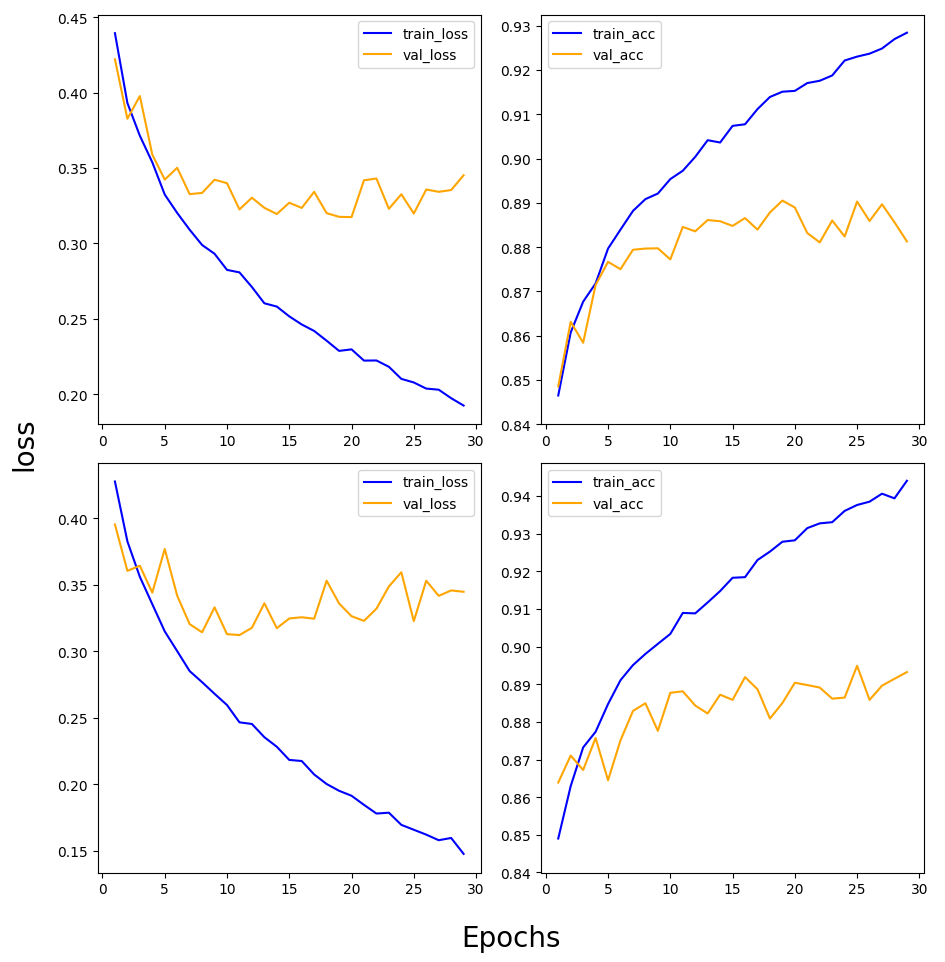

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20, labelpad = 20)
    ax.set_xlabel('Epochs', size = 20, labelpad = 20)

    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)

## 모델 성능평가



In [16]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4030 - acc: 0.8789


[0.40295863151550293, 0.8788999915122986]

## 혼동행렬

*   0,2,6 정확도 낮음-> 데이터 추가->추가학습 필요
   



313/313 [==============================] - 1s 2ms/step


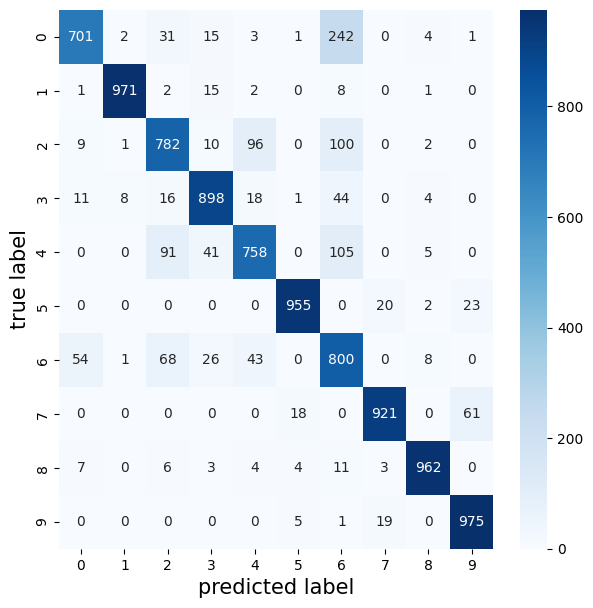

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델예측
y_pred = first_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(y_pred, axis = 1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

*   second: 6 정확도 낮음-> 데이터 추가->추가학습 필요

313/313 [==============================] - 1s 2ms/step


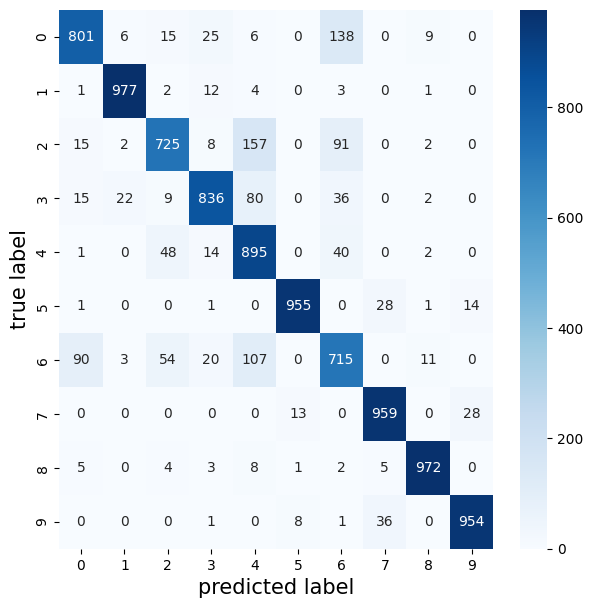

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델예측
y_pred = second_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(y_pred, axis = 1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

## 모델 예측/그리기

313/313 [==============================] - 1s 2ms/step


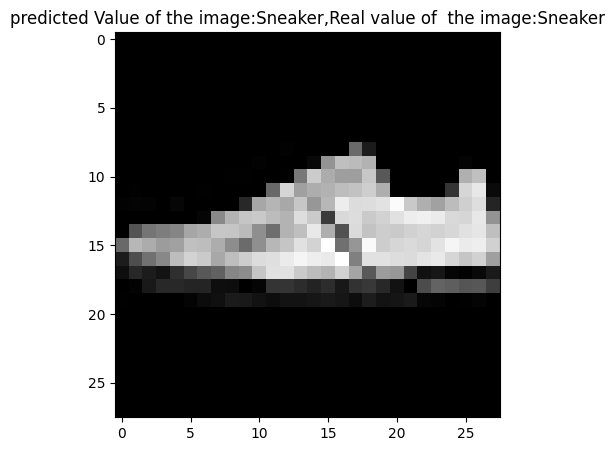

In [19]:
results = first_model.predict(X_test)
arg_results = np.argmax(results, axis=1)

random_idx = np.random.randint(10000)
plt.figure(figsize = (5,5))
plt.imshow(X_test[random_idx], cmap = 'gray')
plt.title('predicted Value of the image:' + class_names[arg_results[random_idx]] +
                                                        ',Real value of  the image:' + class_names[real_y_test[random_idx]])
plt.show()

*  256,128,64,32,10, 다섯개의 레이어로 모델 구성
*  모델 설정, 학습 이전 모델과 동일하게 설정
*  모델 학습 수 history 변수에 담아 결과 분석
*  모델 성능평가 (evaluate, 혼동행렬) 그리고 향후 발전방향 수립
*  수요일에 랜덤하게 2팀 발표

## 세번째 모델 구성하기

In [31]:
# 모델 구성하기

third_model = Sequential()

third_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28)
third_model.add(Dense(256, activation = 'relu'))
third_model.add(Dense(128, activation = 'relu'))
third_model.add(Dense(64, activation = 'relu'))
third_model.add(Dense(32, activation = 'relu'))
third_model.add(Dense(10, activation = 'softmax'))  # 10개로 최종출력, soft max

# 모델 설정하기
third_model.compile(optimizer='adam', # 옵티마이저: Adam
              loss = 'categorical_crossentropy', # 손실 함수: categorical_crossentropy
              metrics=['acc'])


# 모델 학습하기

third_history = third_model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (X_val, y_val))

Epoch 1/30
329/329 [==============================] - 6s 15ms/step - loss: 0.5999 - acc: 0.7936 - val_loss: 0.4425 - val_acc: 0.8391
Epoch 2/30
329/329 [==============================] - 4s 11ms/step - loss: 0.4112 - acc: 0.8525 - val_loss: 0.3804 - val_acc: 0.8625
Epoch 3/30
329/329 [==============================] - 4s 11ms/step - loss: 0.3625 - acc: 0.8672 - val_loss: 0.3725 - val_acc: 0.8629
Epoch 4/30
329/329 [==============================] - 4s 12ms/step - loss: 0.3318 - acc: 0.8775 - val_loss: 0.3490 - val_acc: 0.8758
Epoch 5/30
329/329 [==============================] - 4s 13ms/step - loss: 0.3123 - acc: 0.8841 - val_loss: 0.3299 - val_acc: 0.8773
Epoch 6/30
329/329 [==============================] - 4s 11ms/step - loss: 0.2952 - acc: 0.8906 - val_loss: 0.3470 - val_acc: 0.8719
Epoch 7/30
329/329 [==============================] - 3s 10ms/step - loss: 0.2790 - acc: 0.8969 - val_loss: 0.3321 - val_acc: 0.8790
Epoch 8/30
329/329 [==============================] - 5s 14ms/step - 

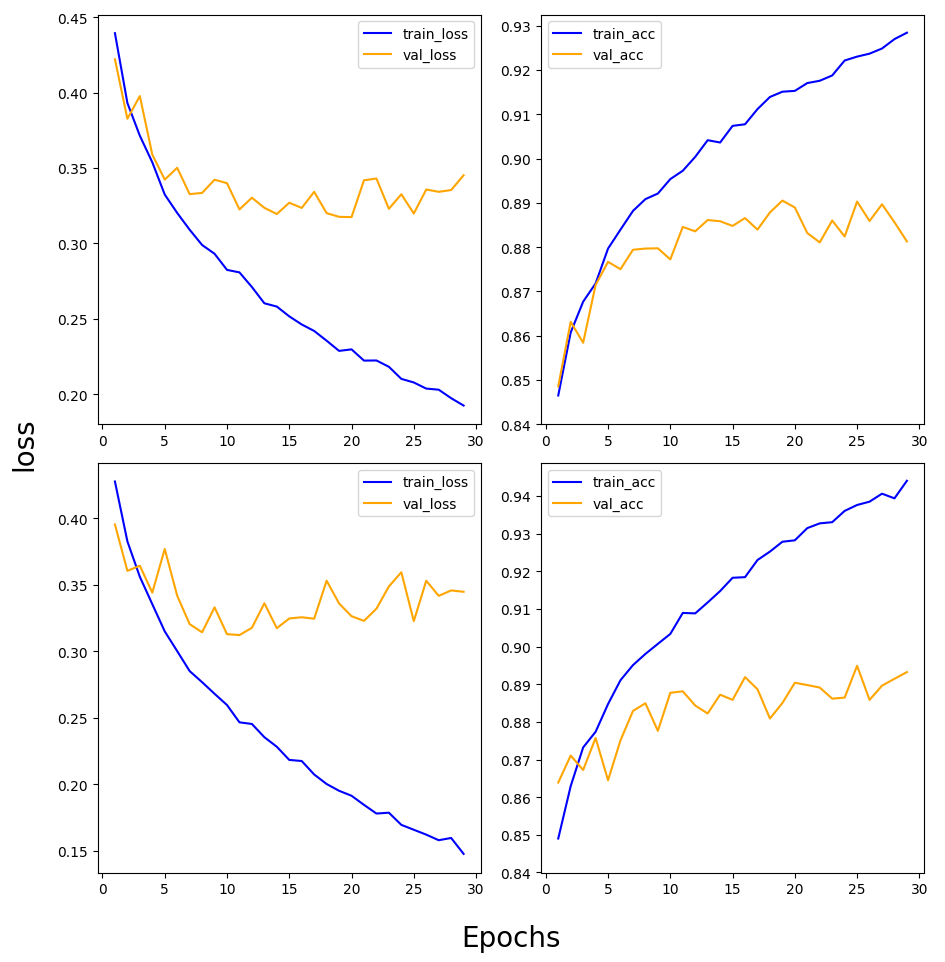

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2,history_3, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    his_dict_3 = history_3.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20, labelpad = 20)
    ax.set_xlabel('Epochs', size = 20, labelpad = 20)

    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history,third_history, 30)

### 모델(3) 성능평가

In [33]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)
third_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4682 - acc: 0.8807


[0.4682018458843231, 0.8806999921798706]

313/313 [==============================] - 1s 3ms/step


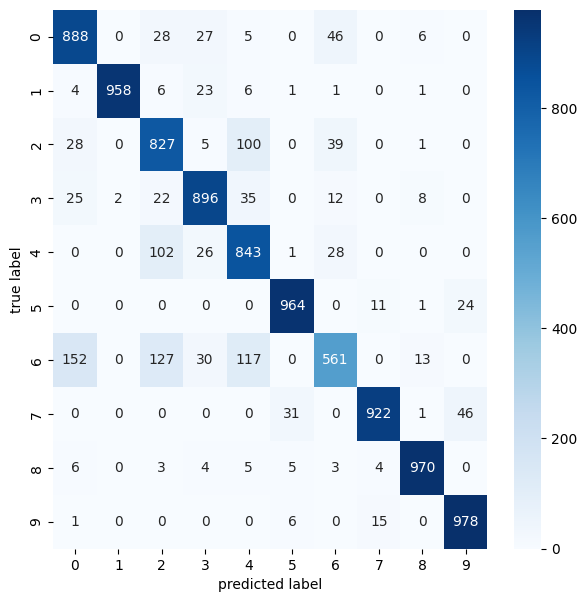

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델예측
y_pred = third_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(y_pred, axis = 1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()